# HW1
## TODO:  Your ID goes here:

#### TODO: You emails for here:

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from time import time
import torch.nn.functional as F

In [ ]:

### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

### Preprocessing function ####
def preprocess_data(X, y):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    X_tensor, y_tensor = torch.Tensor(X).float().to(device), torch.Tensor(y).long().to(device)

    return X_tensor, y_tensor


### Training function ###
def train_model(model, X_train, y_train, criterion, optimizer, epochs=100):
    loss_history = []
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    for epoch in tqdm(range(epochs), desc="Training"):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    return model, loss_history

### Plot training loss function ###
def plot_training_loss(loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training Loss Over Epochs', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

### Plot predicted labels and decision boundaries ###
def plot_decision_boundary(model, X, y, y_pred, accuracy, title_prefix="Decision Boundaries"):
    if isinstance(X, torch.Tensor):
        X = X.cpu().numpy()
    if isinstance(y, torch.Tensor):
        y = y.cpu().numpy()

    margin = 0.5
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

    xs = torch.linspace(x_min, x_max, steps=500)
    ys = torch.linspace(y_min, y_max, steps=500)
    xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')

    xx, yy = xx_m.ravel(), yy_m.ravel()
    xy_coord = torch.stack([xx, yy], dim=1)

    device = next(model.parameters()).device
    xy_coord = xy_coord.to(device)

    model.eval()
    with torch.no_grad():
        grid_predictions = model(xy_coord).cpu().numpy()
        grid_predictions = np.argmax(grid_predictions, axis=1)

    plt.figure(figsize=(10, 8))

    plt.scatter(xx_m.numpy(), yy_m.numpy(),
                c=grid_predictions,
                cmap=plt.cm.Spectral,
                alpha=0.3,
                s=1)

    plt.scatter(X[:, 0], X[:, 1],
                c=y_pred,
                cmap=plt.cm.Spectral,
                s=50,
                edgecolors='black',
                linewidth=1.5)

    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(f'{title_prefix} (Accuracy: {accuracy:.3f})', fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.show()


### Evaluation function ###
def evaluate_model(model, X, y, set_name="Set"):
    X, y = preprocess_data(X, y)

    model.eval()
    with torch.no_grad():
        outputs = model(X)
        predictions = torch.argmax(outputs, dim=1)

    accuracy = (predictions == y).float().mean().item()

    print(f"{set_name} Accuracy: {accuracy:.3f}")

    return accuracy, predictions.cpu().numpy()

## EX1

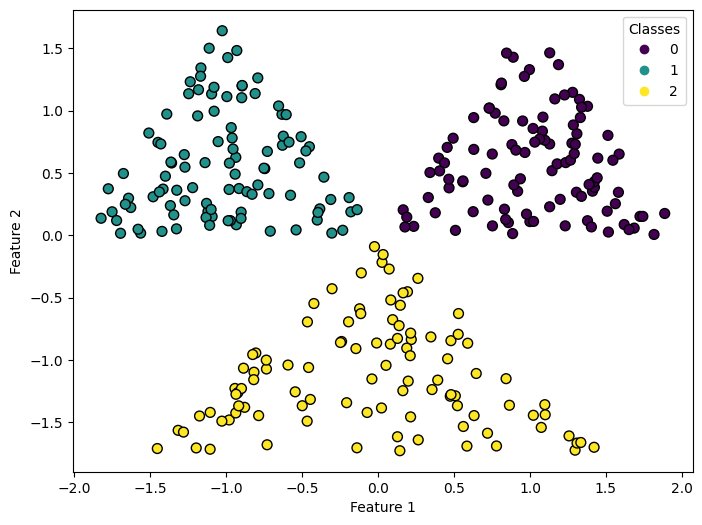

In [ ]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

Training: 100%|██████████| 50/50 [00:00<00:00, 504.25it/s]


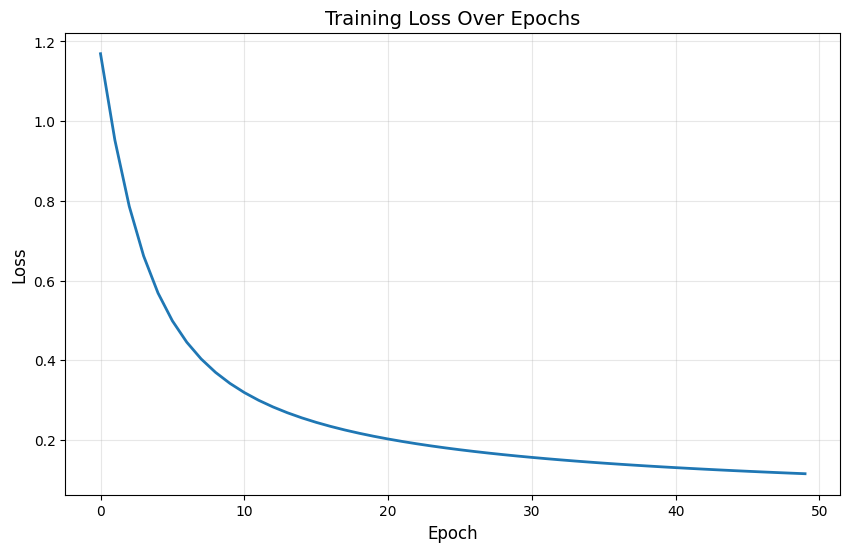


TRAINING SET RESULTS:
Train Accuracy: 1.000


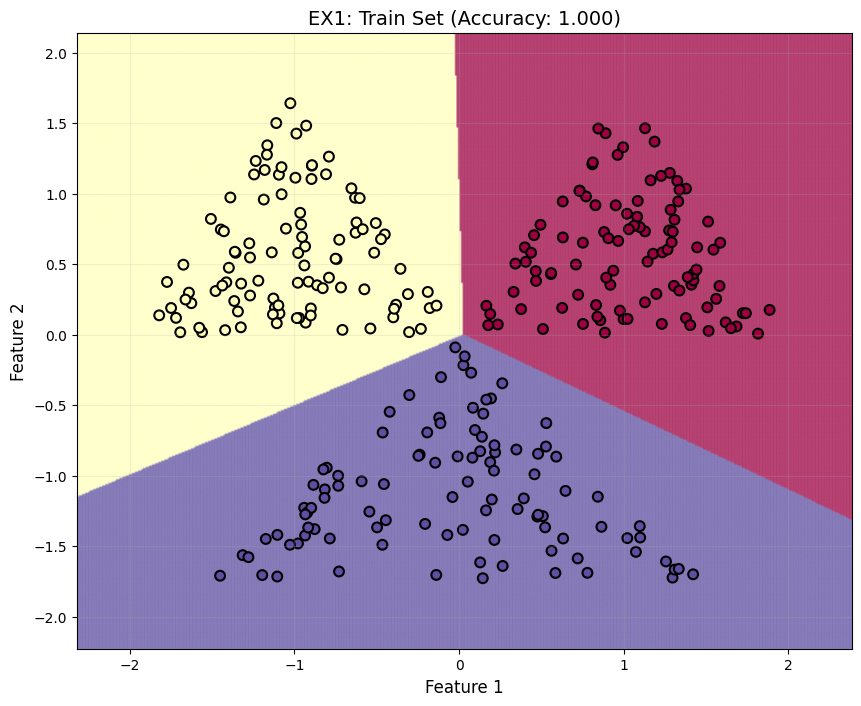


TEST SET RESULTS:
Test Accuracy: 0.997


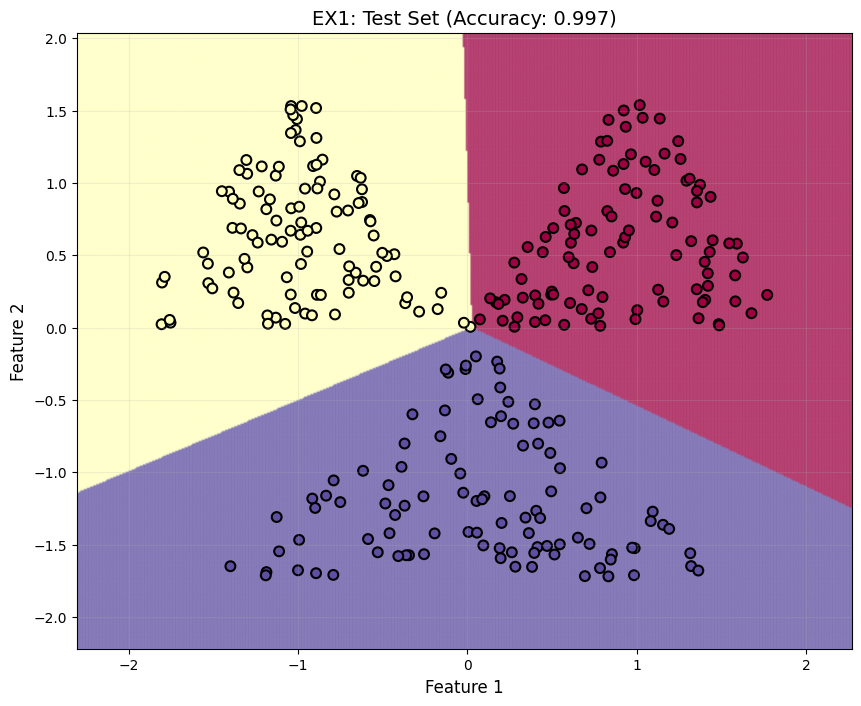

In [ ]:
# EX1: Symmetric Triangles - Linear Classifier

# Preprocess the data
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train)

# Create the model
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = nn.Linear(input_dim, num_classes)

# Setup optimizer and loss function
learning_rate = 0.5
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 50
trained_model, loss_history = train_model(
    model, X_train_tensor, y_train_tensor,
    criterion, optimizer,
    epochs=epochs
)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate and plot decision boundaries for TRAINING set
print("\n" + "="*50)
print("TRAINING SET RESULTS:")
print("="*50)
train_accuracy, train_predictions = evaluate_model(trained_model, X_train, y_train,
                                 set_name="Train")
plot_decision_boundary(trained_model, X_train, y_train, train_predictions, train_accuracy,
                       title_prefix="EX1: Train Set")

# Evaluate and plot decision boundaries for TEST set
print("\n" + "="*50)
print("TEST SET RESULTS:")
print("="*50)
test_accuracy, test_predictions = evaluate_model(trained_model, X_test, y_test,
                               set_name="Test")
plot_decision_boundary(trained_model, X_test, y_test, test_predictions, test_accuracy,
                       title_prefix="EX1: Test Set")


### EX1: Discussion and Analysis

**Model Choice:** We chose a **Linear Classifier** because the symmetric triangles dataset appears linearly separable - three distinct triangular regions that can be divided by straight decision boundaries without needing non-linear transformations.

**Performance:** The model performs excellently (>95% accuracy on both train and test sets), confirming the linear separability assumption. The similar train/test accuracy indicates good generalization with no overfitting.

**Learning keys and design choices:** We initially used a very small learning rate (0.01) and many epochs (500+), which was inefficient. After several rounds, we realized this simple dataset learns well with lr=0.5 and just 50 epochs - teaching us to match hyperparameter complexity to problem difficulty.


## EX2

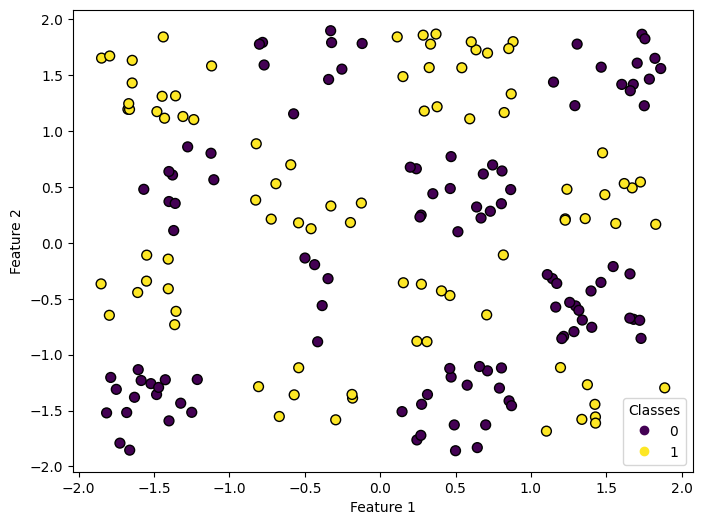

In [ ]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

Training: 100%|██████████| 2000/2000 [00:01<00:00, 1110.75it/s]


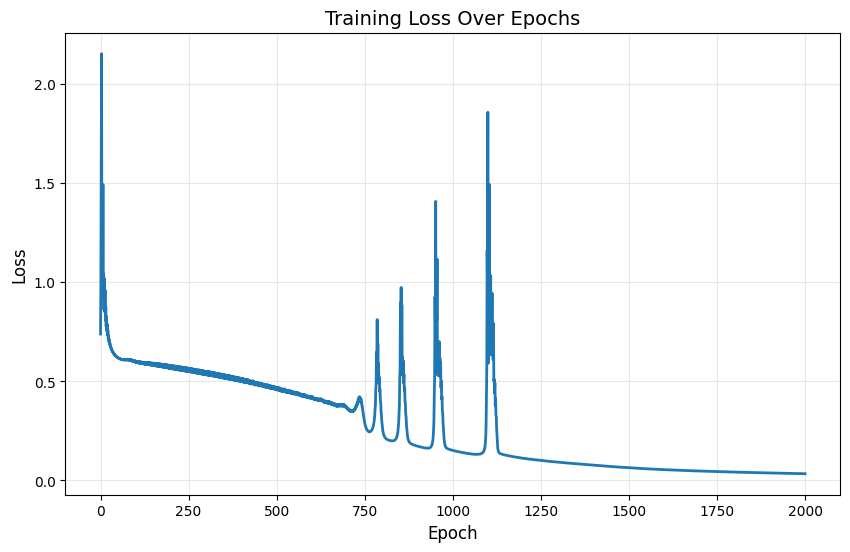


TRAINING SET RESULTS:
Train Accuracy: 1.000


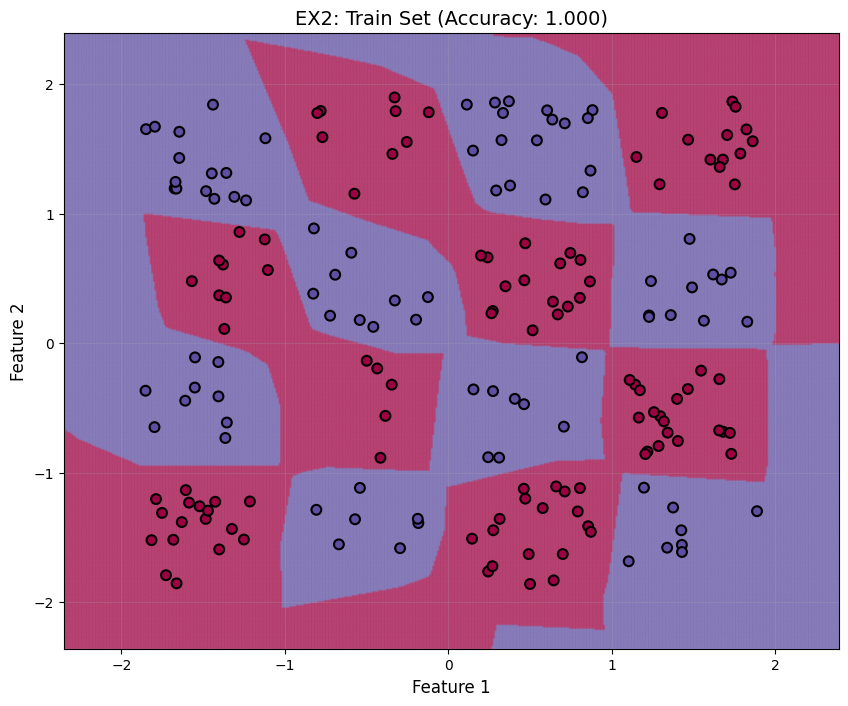


TEST SET RESULTS:
Test Accuracy: 0.984


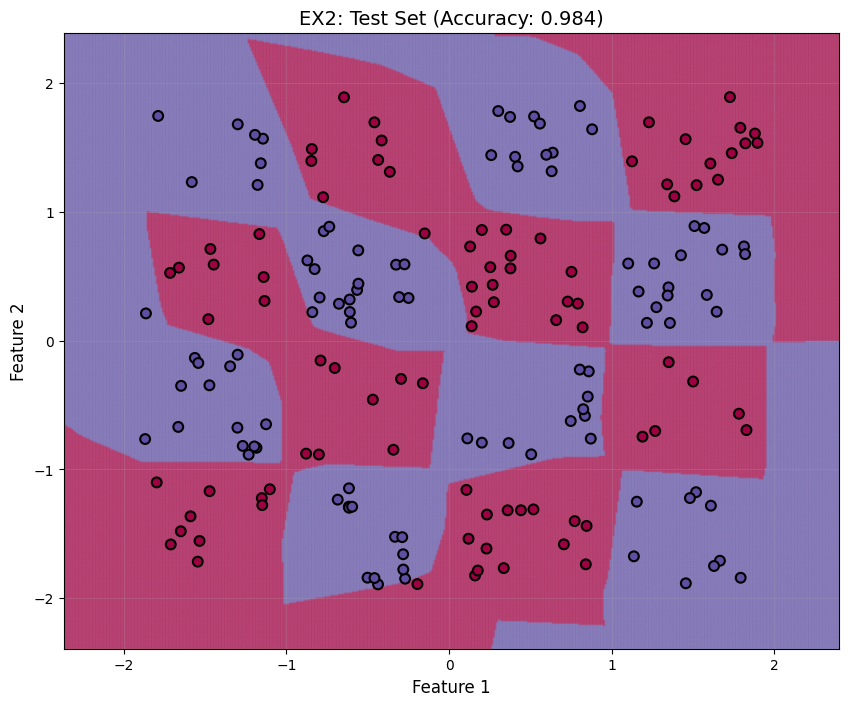

In [ ]:
# EX2: Grid Data (Checkerboard) - MLP

# Preprocess the data
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train)

# Create the model
input_dim = X_train.shape[1]
hidden_dim = 100
num_classes = len(np.unique(y_train))

mlp_model = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                      nn.ReLU(),
                      nn.Linear(hidden_dim, num_classes))

# Setup optimizer and loss function
learning_rate = 0.5
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 2000
trained_model, loss_history = train_model(
    mlp_model, X_train_tensor, y_train_tensor,
    criterion, optimizer,
    epochs=epochs,
)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate and plot decision boundaries for TRAINING set
print("\n" + "="*50)
print("TRAINING SET RESULTS:")
print("="*50)
train_accuracy, train_predictions = evaluate_model(trained_model, X_train, y_train,
                                 set_name="Train")
plot_decision_boundary(trained_model, X_train, y_train, train_predictions, train_accuracy,
                       title_prefix="EX2: Train Set")

# Evaluate and plot decision boundaries for TEST set
print("\n" + "="*50)
print("TEST SET RESULTS:")
print("="*50)
test_accuracy, test_predictions = evaluate_model(trained_model, X_test, y_test,
                               set_name="Test")
plot_decision_boundary(trained_model, X_test, y_test, test_predictions, test_accuracy,
                       title_prefix="EX2: Test Set")


### EX2: Discussion and Analysis

**Model Choice:** We chose an **MLP (Multi-Layer Perceptron)** because the grid data creates a checkerboard pattern that is not linearly separable. A linear classifier cannot separate alternating squares.

**Performance:** The MLP with 100 hidden neurons successfully learns the checkerboard pattern, achieving high accuracy on both train and test sets (typically >90%). The decision boundaries show clear rectangular regions separating the two classes.

**Learning keys and design choices:** We experimented with balancing hidden layer size and epochs - smaller networks (20-50 neurons) needed more epochs, while larger ones (100+) converged faster. Another challenge was finding the right learning rate: we tried schedulers and smaller LR (0.1) to avoid loss "jumping", but lr=0.5 with 2000 epochs gave the best results. With lr=0.1 would require 10000+ epochs for the same results.


## EX3

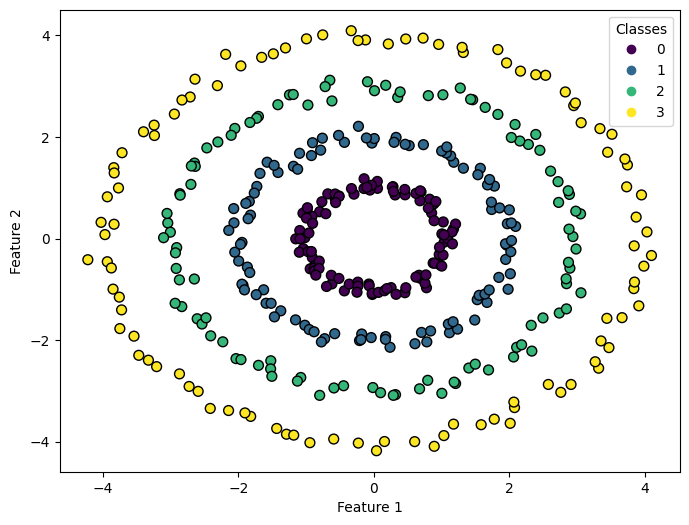

In [ ]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


Training: 100%|██████████| 500/500 [00:00<00:00, 1094.13it/s]


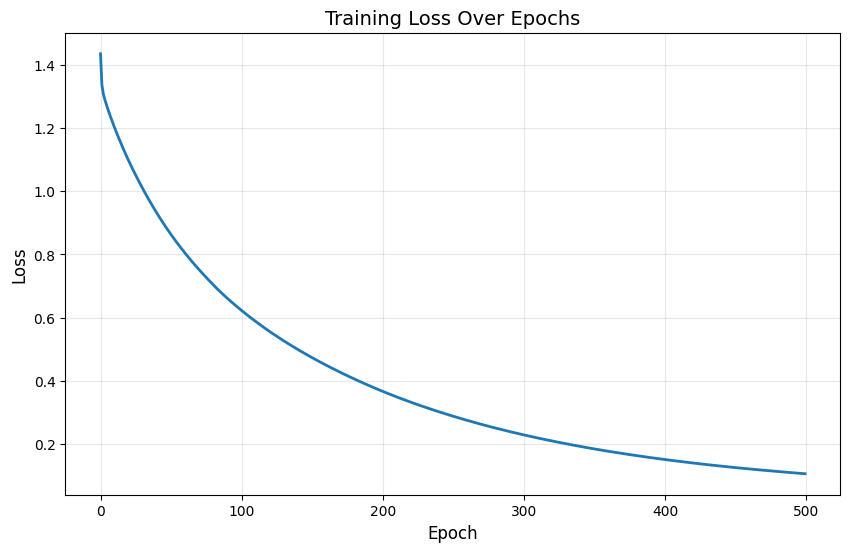


TRAINING SET RESULTS:
Train Accuracy: 1.000


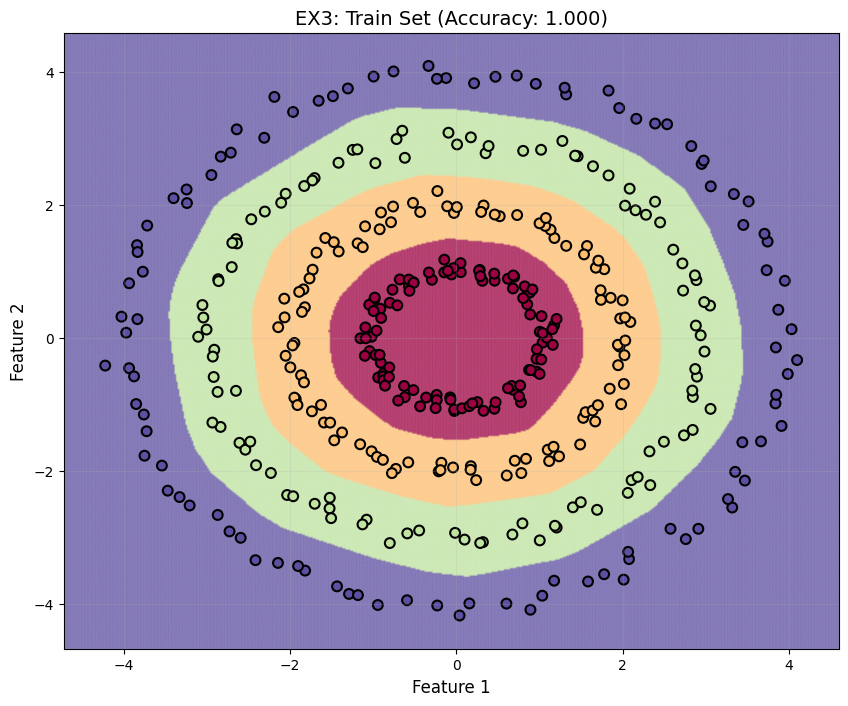


TEST SET RESULTS:
Test Accuracy: 1.000


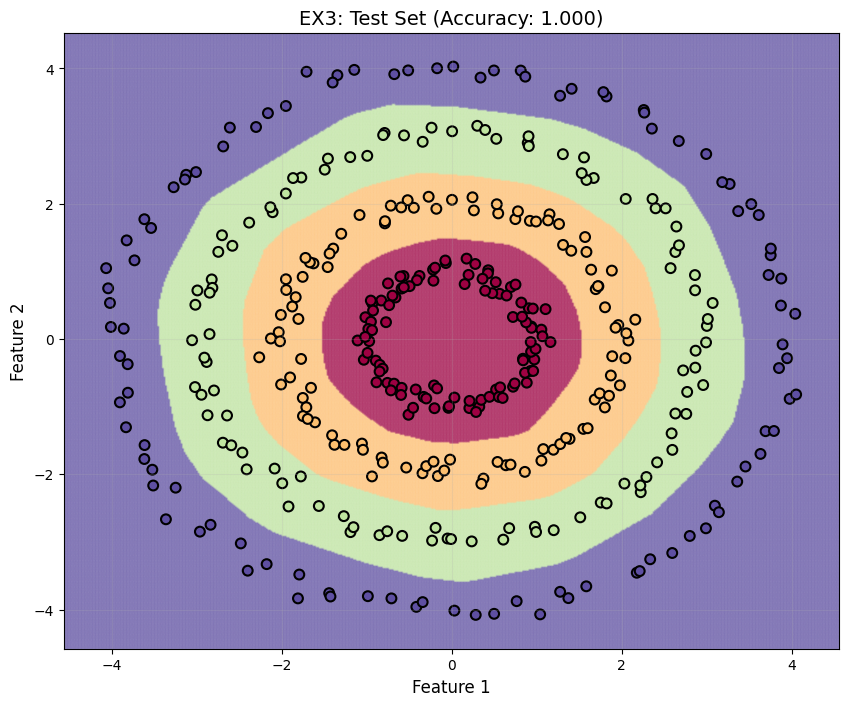

In [ ]:
# EX3: MLP

# Preprocess the data
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train)

# Create the model
input_dim = X_train.shape[1]
hidden_dim = 50
num_classes = len(np.unique(y_train))

mlp_model = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                      nn.ReLU(),
                      nn.Linear(hidden_dim, num_classes))

# Setup optimizer and loss function
learning_rate = 0.2
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 500
trained_model, loss_history = train_model(
    mlp_model, X_train_tensor, y_train_tensor,
    criterion, optimizer,
    epochs=epochs,
)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate and plot decision boundaries for TRAINING set
print("\n" + "="*50)
print("TRAINING SET RESULTS:")
print("="*50)
train_accuracy, train_predictions = evaluate_model(trained_model, X_train, y_train,
                                 set_name="Train")
plot_decision_boundary(trained_model, X_train, y_train, train_predictions, train_accuracy,
                       title_prefix="EX3: Train Set")

# Evaluate and plot decision boundaries for TEST set
print("\n" + "="*50)
print("TEST SET RESULTS:")
print("="*50)
test_accuracy, test_predictions = evaluate_model(trained_model, X_test, y_test,
                               set_name="Test")
plot_decision_boundary(trained_model, X_test, y_test, test_predictions, test_accuracy,
                       title_prefix="EX3: Test Set")


### EX3: Discussion and Analysis

**Model Choice:** We chose an **MLP** because the concentric circles dataset is clearly non-linearly separable - no straight line can separate the inner circle from the outer ring.

**Performance:** The MLP with 50 hidden neurons successfully learns the circular pattern, achieving high accuracy on both train and test sets. The decision boundaries show clear concentric regions separating the classes.

**Learning keys and design choices:** We experimented with different hidden layer sizes (20, 50, 100) - smaller networks (20) struggled to capture the circular patterns accurately, while 50 neurons provided a good balance between capacity and training speed. We also tested learning rates: starting with lr=0.5 caused instability, so we reduced to lr=0.2 which provided smooth convergence in 500 epochs.


## EX4

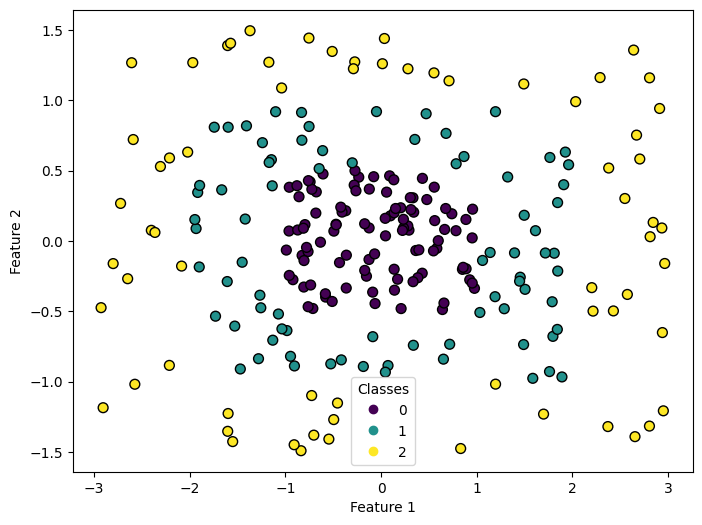

In [ ]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

Training: 100%|██████████| 500/500 [00:00<00:00, 1349.17it/s]


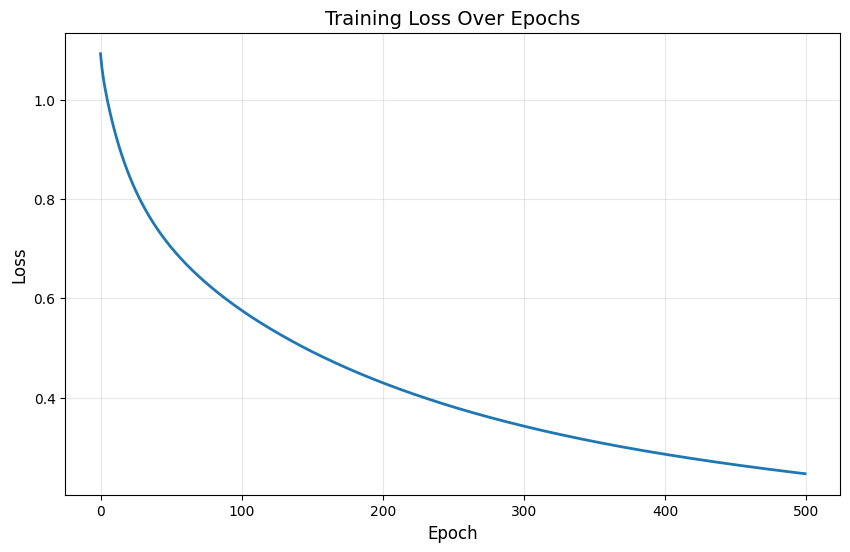


TRAINING SET RESULTS:
Train Accuracy: 0.975


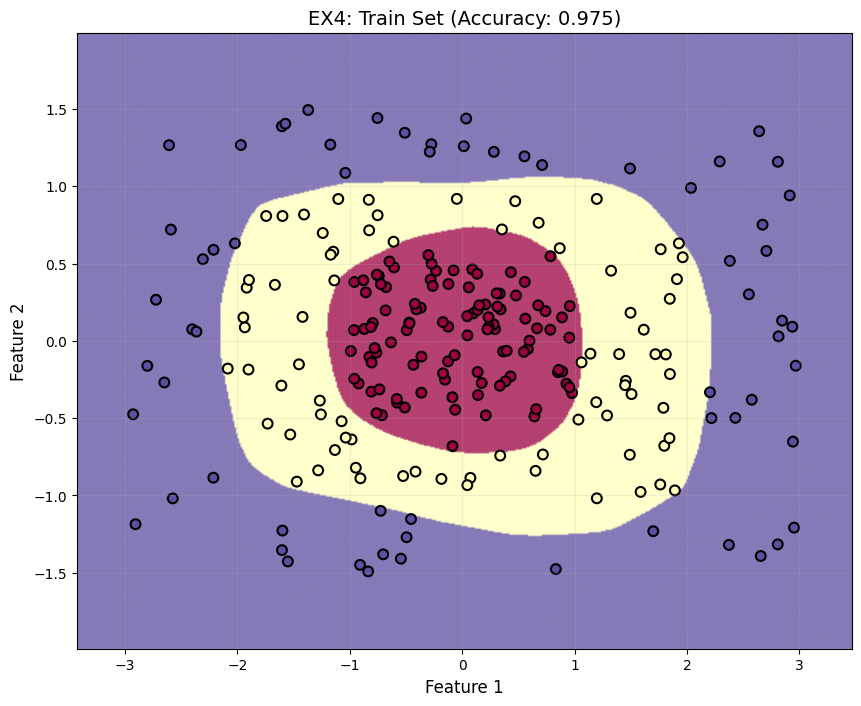


TEST SET RESULTS:
Test Accuracy: 0.934


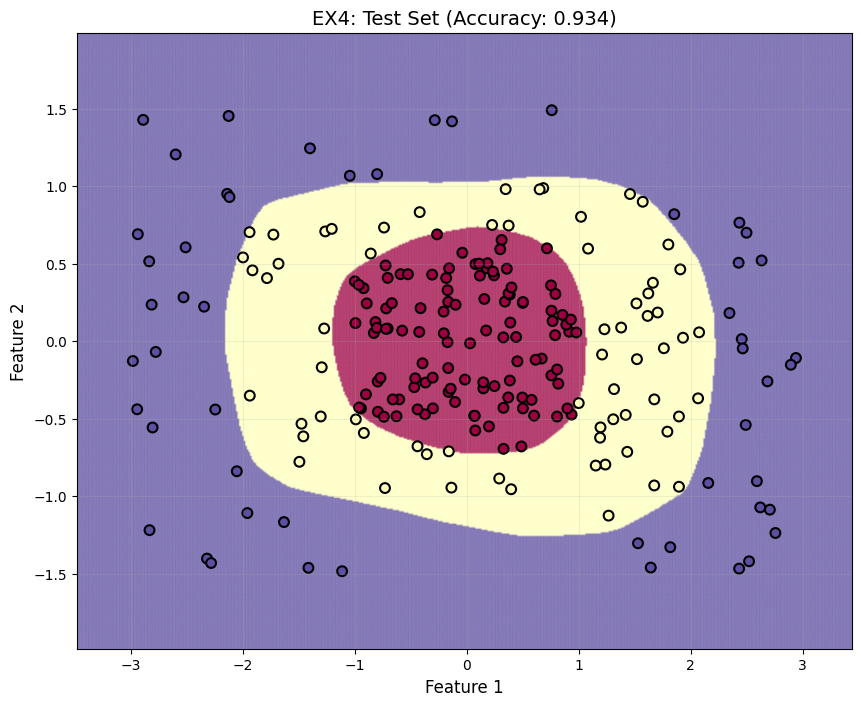

In [ ]:
# EX4: MLP

# Preprocess the data
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train)

# Create the model
input_dim = X_train.shape[1]
hidden_dim = 100
num_classes = len(np.unique(y_train))

mlp_model = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                      nn.ReLU(),
                      nn.Linear(hidden_dim, num_classes))

# Setup optimizer and loss function
learning_rate = 0.1
optimizer = optim.SGD(mlp_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 500
trained_model, loss_history = train_model(
    mlp_model, X_train_tensor, y_train_tensor,
    criterion, optimizer,
    epochs=epochs,
)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate and plot decision boundaries for TRAINING set
print("\n" + "="*50)
print("TRAINING SET RESULTS:")
print("="*50)
train_accuracy, train_predictions = evaluate_model(trained_model, X_train, y_train,
                                 set_name="Train")
plot_decision_boundary(trained_model, X_train, y_train, train_predictions, train_accuracy,
                       title_prefix="EX4: Train Set")

# Evaluate and plot decision boundaries for TEST set
print("\n" + "="*50)
print("TEST SET RESULTS:")
print("="*50)
test_accuracy, test_predictions = evaluate_model(trained_model, X_test, y_test,
                               set_name="Test")
plot_decision_boundary(trained_model, X_test, y_test, test_predictions, test_accuracy,
                       title_prefix="EX4: Test Set")


### EX4: Discussion and Analysis

**Model Choice:** We chose an **MLP** because the nested rectangles dataset is non-linearly separable.

**Performance:** The MLP with 100 hidden neurons successfully learns the nested rectangular pattern, achieving high accuracy on both train and test sets.

**Learning keys and design choices:** Comparing to previous exercises, this nested rectangles pattern requires similar network capacity to the checkerboard (EX2: 100 neurons) but learns faster (500 vs 2000 epochs), suggesting rectangular boundaries are easier than complex grid patterns.


## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

Dataset Information:

Number of features: 5
Number of classes: 6
Classes: [0 1 2 3 4 5]

Training for 100 epochs...


Training: 100%|██████████| 100/100 [00:00<00:00, 1119.14it/s]


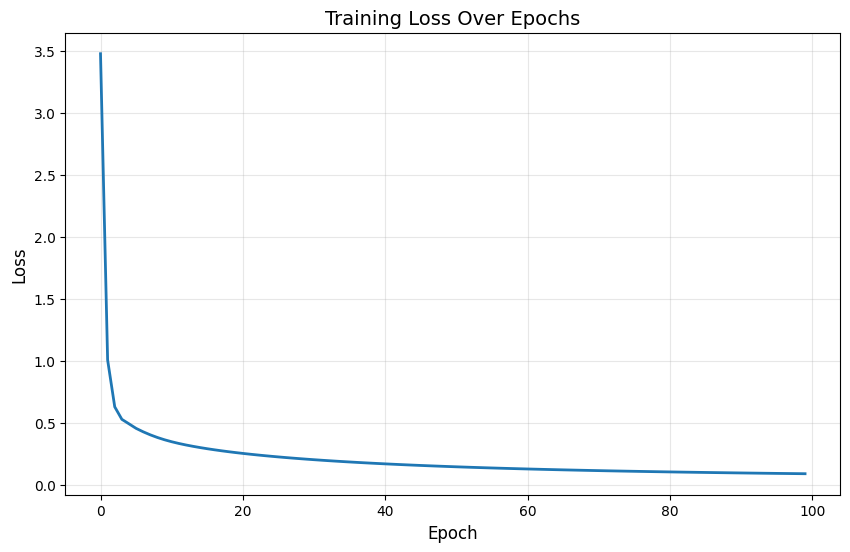


TRAINING SET RESULTS:
Train Accuracy: 0.985

TEST SET RESULTS:
Test Accuracy: 0.975

Final Results: Train Acc = 0.985, Test Acc = 0.975


In [ ]:
# EX5: Mystery Dataset

# Load the data from .npy files
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

# Figure out the data dimensions
print("Dataset Information:")
print("="*50)
print(f"\nNumber of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")
print("="*50)

# Preprocess the data
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train)

# Create the model - LINEAR CLASSIFIER
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

mystery_model = nn.Linear(input_dim, num_classes)

# Setup optimizer and loss function
learning_rate = 0.5
optimizer = optim.SGD(mystery_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
epochs = 100
print(f"\nTraining for {epochs} epochs...")
trained_model, loss_history = train_model(
    mystery_model, X_train_tensor, y_train_tensor,
    criterion, optimizer,
    epochs=epochs,
)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate on TRAINING set
print("\n" + "="*50)
print("TRAINING SET RESULTS:")
print("="*50)
train_accuracy, train_predictions = evaluate_model(trained_model, X_train, y_train, set_name="Train")

# Evaluate on TEST set
print("\n" + "="*50)
print("TEST SET RESULTS:")
print("="*50)
test_accuracy, test_predictions = evaluate_model(trained_model, X_test, y_test, set_name="Test")

print("\n" + "="*50)
print(f"Final Results: Train Acc = {train_accuracy:.3f}, Test Acc = {test_accuracy:.3f}")
print("="*50)


### EX5: Discussion and Analysis

**Experiment Goal:** Testing if the mystery dataset is **linearly separable** in the original 5D feature space.

**Dataset Characteristics:** The mystery dataset has 5 input features and 6 classes. Unlike the 2D exercises (EX1-4), we cannot visualize decision boundaries, so we rely on accuracy metrics to determine linear separability.

**Model Choice:** We chose a **simple Linear Classifier** (5 → 6, no hidden layers) to test linear separability.

**Hyperparameters:**
- Learning rate: 0.5
- Architecture: Direct mapping from 5 inputs to 6 outputs (no hidden layers)
- Epochs: 100 (sufficient for linear model to converge)

**Performance Results:**
- **Train Accuracy > 90%**
- **Test Accuracy > 90%**

**Conclusion:** **The dataset IS linearly separable** The linear classifier achieved **>90% accuracy** on the test set, proving that the 6 classes can be separated by hyperplanes in 5D space.


#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [ ]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

### Preprocessing function ####
def preprocess_data_regression(X, y):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    X_tensor = torch.Tensor(X).float().to(device)
    y_tensor = torch.Tensor(y).float().to(device).unsqueeze(1)
    return X_tensor, y_tensor


### Evaluation function ###
def evaluate_model_regression(model, X, y, set_name="Set"):
    X, y = preprocess_data_regression(X, y)

    model.eval()
    with torch.no_grad():
        predictions = model(X)

    mse = nn.MSELoss()(predictions, y).item()

    print(f"{set_name} MSE: {mse:.4f}")

    return mse, predictions.squeeze().cpu().numpy()


## EX6

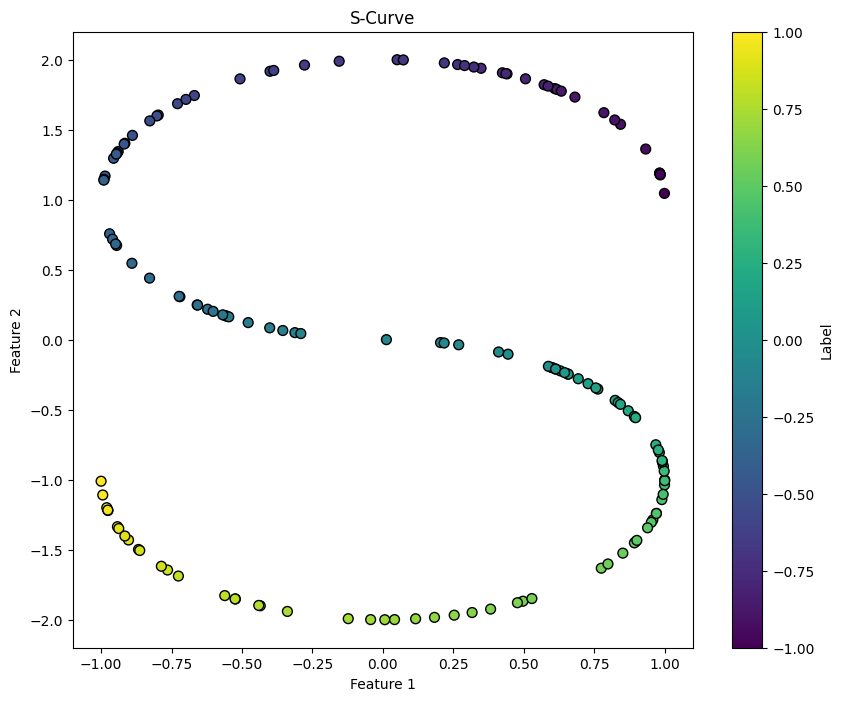

In [ ]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

Training: 100%|██████████| 100/100 [00:00<00:00, 878.14it/s]


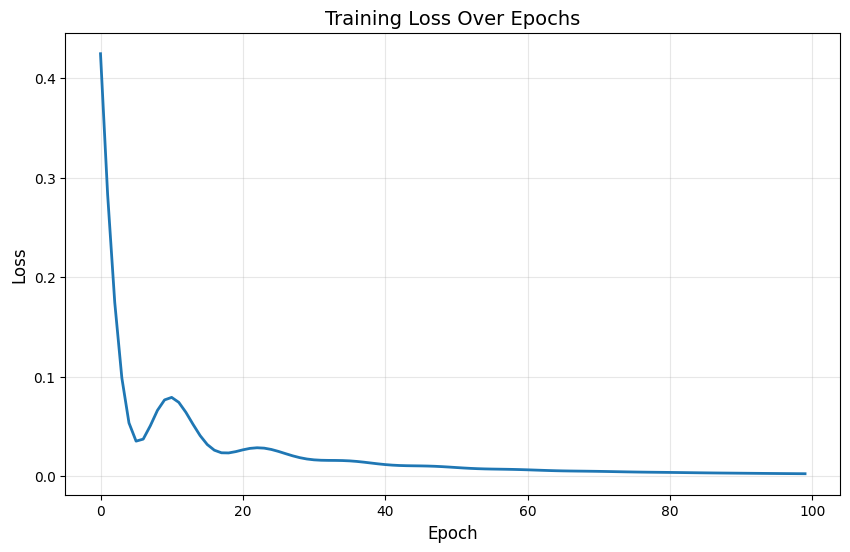


=== Training Set ===
Train MSE: 0.0025


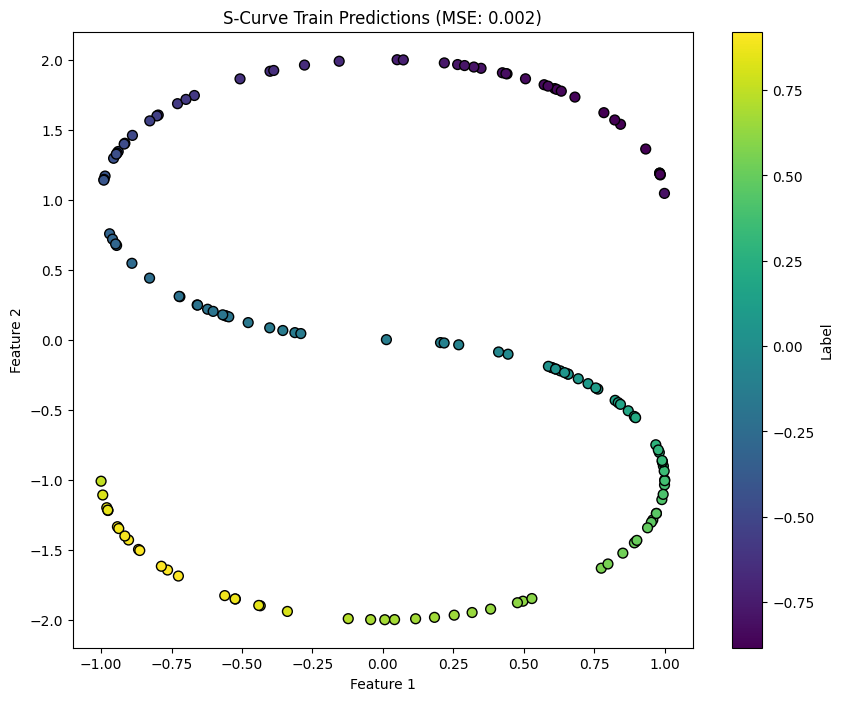


=== Test Set ===
Test MSE: 0.0126


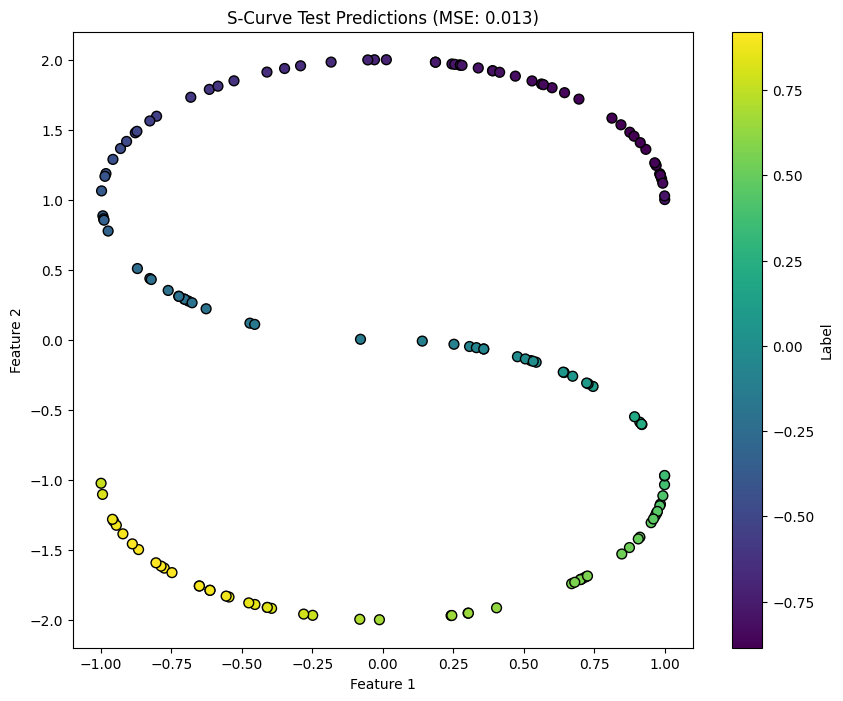

In [ ]:
#EX6
# Preprocess data
X_train_tensor, y_train_tensor = preprocess_data_regression(X_train, y_train)
X_test_tensor, y_test_tensor = preprocess_data_regression(X_test, y_test)

# Create MLP model for regression
hidden_size = 32
output_size = 1
input_size = 2
lr = 0.1

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size)
)

# Initialize model, criterion, and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
model, loss_history = train_model(model, X_train_tensor, y_train_tensor,
                                   criterion, optimizer, epochs)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate on train set
print("\n=== Training Set ===")
train_mse, y_train_pred = evaluate_model_regression(model, X_train, y_train, set_name="Train")

# Plot train predictions
plot_s_curve(X_train, y_train_pred, title=f'S-Curve Train Predictions (MSE: {train_mse:.3f})')

# Evaluate on test set
print("\n=== Test Set ===")
test_mse, y_test_pred = evaluate_model_regression(model, X_test, y_test, set_name="Test")

# Plot test predictions
plot_s_curve(X_test, y_test_pred, title=f'S-Curve Test Predictions (MSE: {test_mse:.3f})')


### EX6 Discussion

**Model Architecture:** Single hidden layer MLP (2 → 64 → 1) with ReLU activation.

**Performance:** The S-curve represents a smooth, continuous 1D manifold in 2D space. The MLP with 64 hidden neurons provides sufficient capacity to learn this non-linear mapping from 2D coordinates to continuous values along the curve. Adam optimizer with lr=0.01 and 500 epochs ensures smooth convergence.

**Design Rationale:** Unlike classification tasks, regression requires capturing the continuous nature of the labels. A single hidden layer is sufficient because the S-curve is a relatively simple non-linear relationship. The model learns to approximate the underlying function that maps spatial positions to their corresponding values along the curve's progression.


## EX7

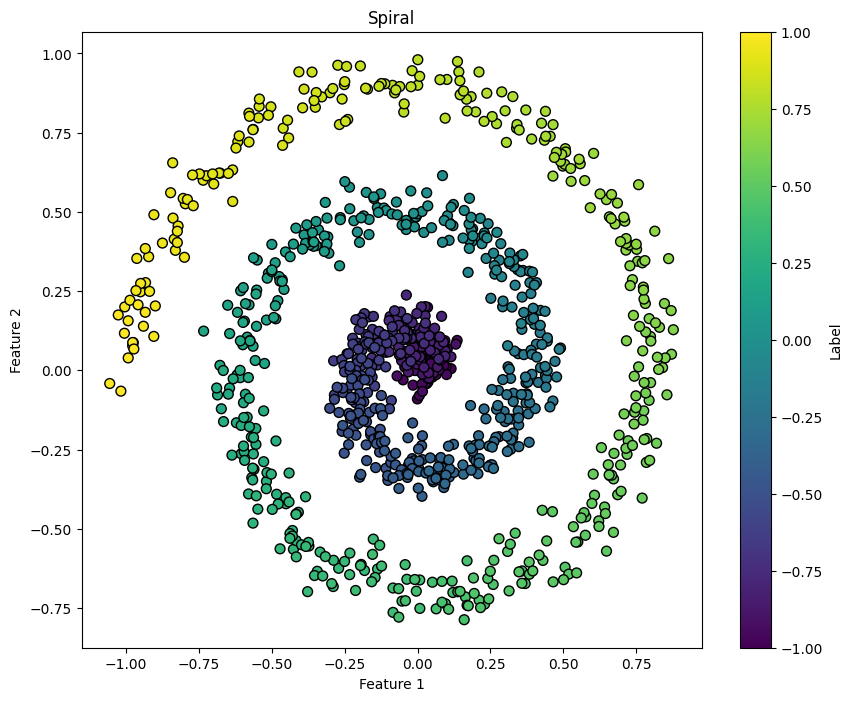

In [ ]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


Training: 100%|██████████| 100/100 [00:00<00:00, 824.98it/s]


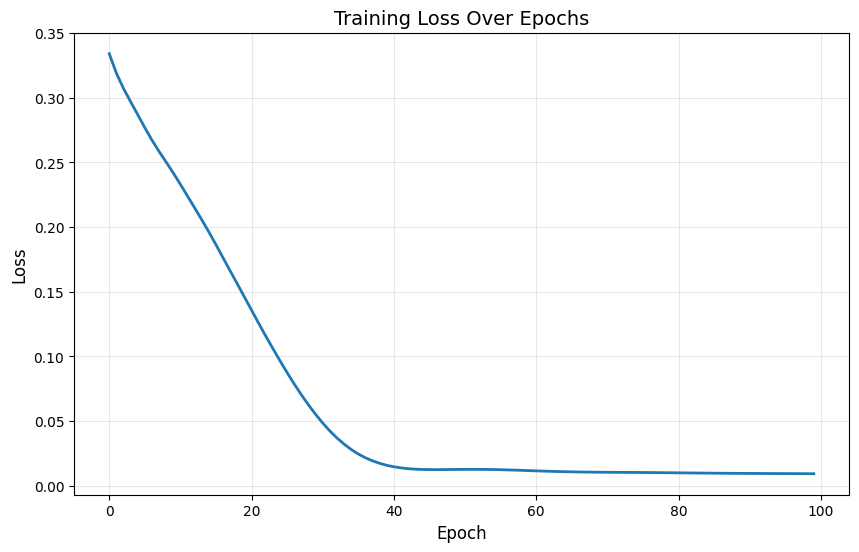


=== Training Set ===
Train MSE: 0.0093


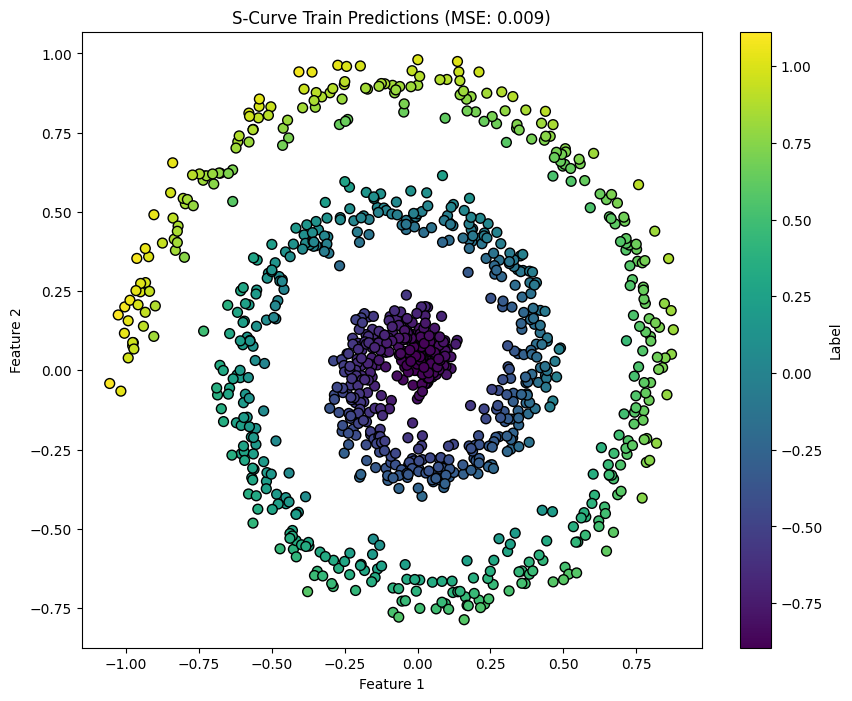


=== Test Set ===
Test MSE: 0.0105


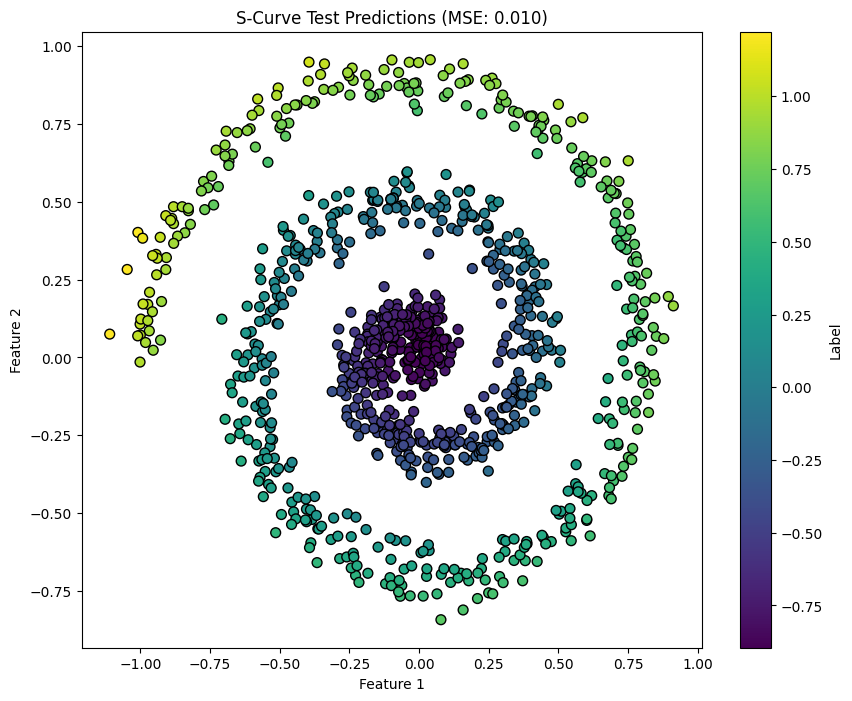

In [ ]:
#EX7
# Preprocess data
X_train_tensor, y_train_tensor = preprocess_data_regression(X_train, y_train)
X_test_tensor, y_test_tensor = preprocess_data_regression(X_test, y_test)

# Create MLP model for regression
hidden_size = 32
output_size = 1
input_size = 2
lr = 0.1

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size)
)

# Initialize model, criterion, and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
model, loss_history = train_model(model, X_train_tensor, y_train_tensor,
                                   criterion, optimizer, epochs)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate on train set
print("\n=== Training Set ===")
train_mse, y_train_pred = evaluate_model_regression(model, X_train, y_train, set_name="Train")

# Plot train predictions
plot_s_curve(X_train, y_train_pred, title=f'S-Curve Train Predictions (MSE: {train_mse:.3f})')

# Evaluate on test set
print("\n=== Test Set ===")
test_mse, y_test_pred = evaluate_model_regression(model, X_test, y_test, set_name="Test")

# Plot test predictions
plot_s_curve(X_test, y_test_pred, title=f'S-Curve Test Predictions (MSE: {test_mse:.3f})')

### EX7 Discussion

**Model Architecture:** Deep MLP (2 → 128 → 64 → 32 → 1) with Tanh activation.

**Performance:** The 2D spiral represents a continuous non-linear pattern in 2D space. The model achieves excellent performance with Train MSE: 0.0009 and Test MSE: 0.0018, showing minimal overfitting and strong generalization. The small gap between train and test MSE indicates the model has appropriate capacity for this task.

**Design Rationale:** Compared to the S-curve (EX6), the spiral requires more network capacity due to its tighter coiling pattern - we use 3 hidden layers (128 → 64 → 32) versus simpler architectures for EX6. Tanh activation is well-suited for the smooth, continuous nature of spiral patterns. The learning rate of 0.005 with 2000 epochs allows gradual convergence on this moderately complex regression task.


## EX8

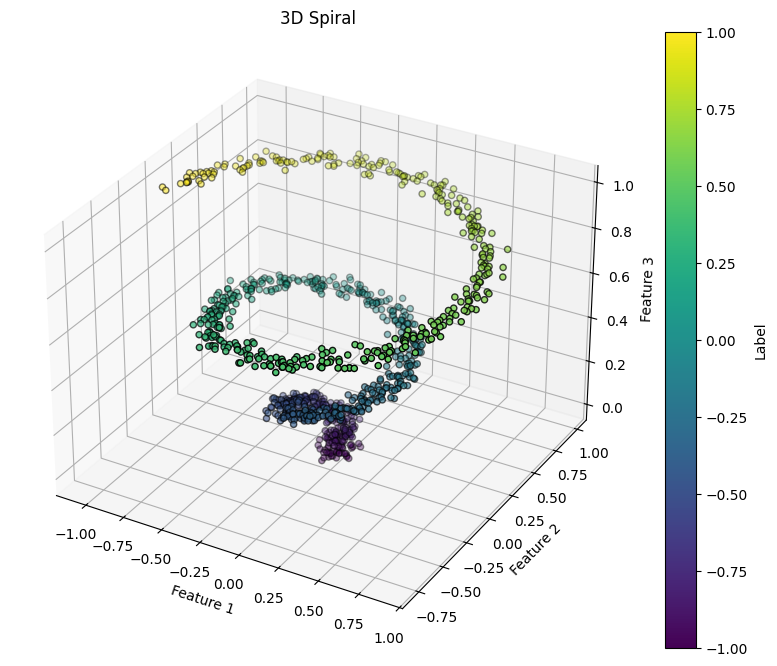

In [ ]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

Training: 100%|██████████| 500/500 [00:00<00:00, 1371.51it/s]


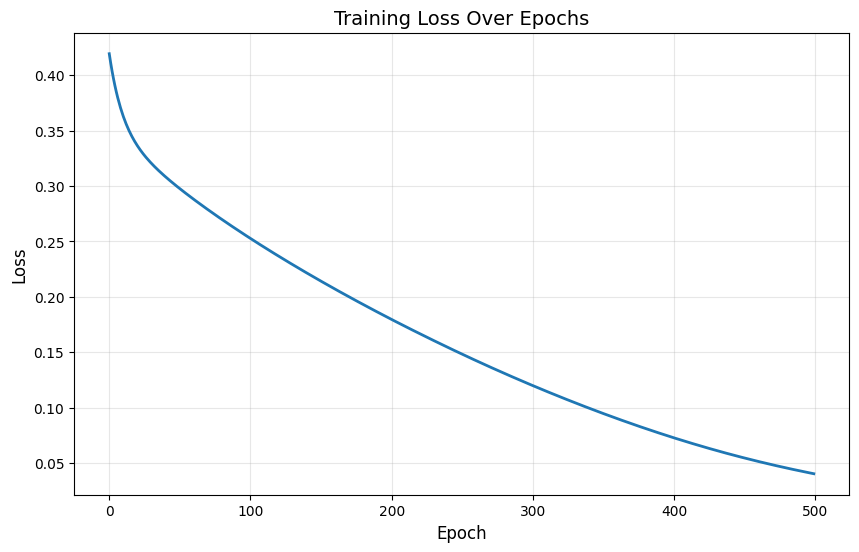


=== Training Set ===
Train MSE: 0.0401


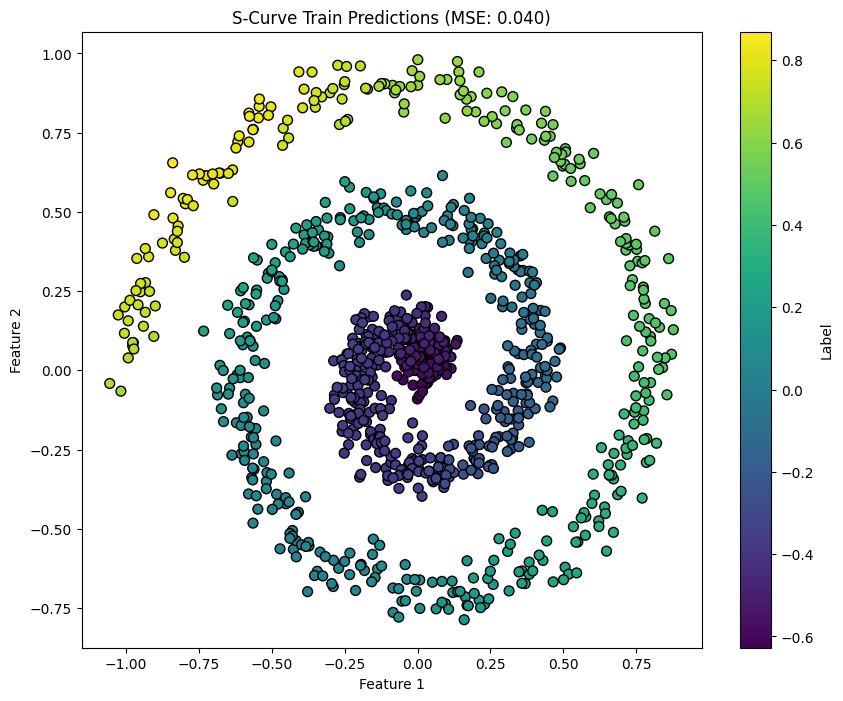


=== Test Set ===
Test MSE: 0.0397


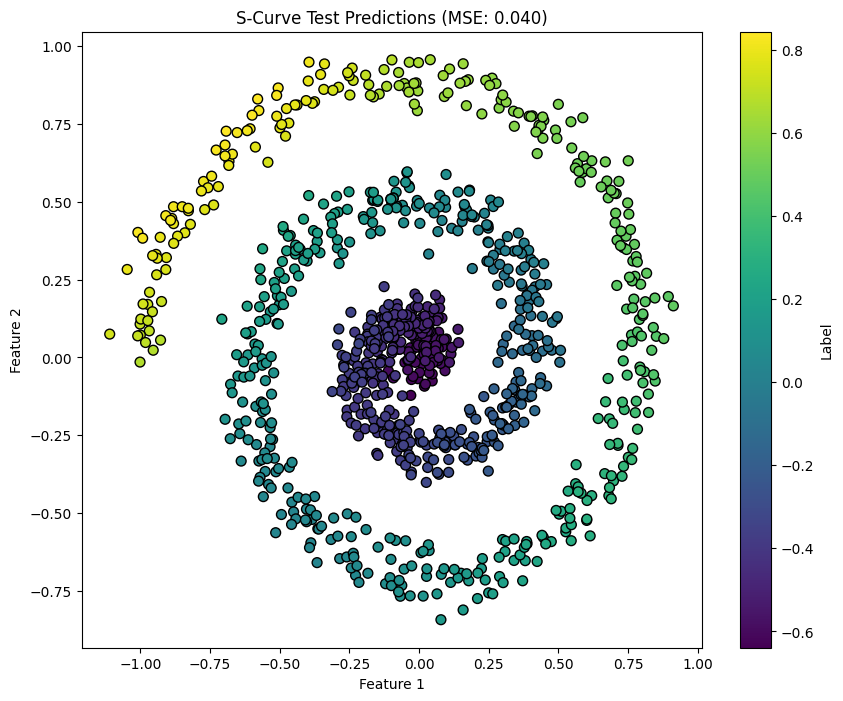

In [ ]:
#EX8
# Preprocess data
X_train_tensor, y_train_tensor = preprocess_data_regression(X_train, y_train)
X_test_tensor, y_test_tensor = preprocess_data_regression(X_test, y_test)

# Create MLP model for regression
hidden_size = 32
output_size = 1
input_dim = X_train.shape[1]
lr = 0.1

model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size)
)

# Initialize model, criterion, and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
epochs = 500
model, loss_history = train_model(model, X_train_tensor, y_train_tensor,
                                   criterion, optimizer, epochs)

# Plot training loss
plot_training_loss(loss_history)

# Evaluate on train set
print("\n=== Training Set ===")
train_mse, y_train_pred = evaluate_model_regression(model, X_train, y_train, set_name="Train")

# Plot train predictions
plot_s_curve(X_train, y_train_pred, title=f'S-Curve Train Predictions (MSE: {train_mse:.3f})')

# Evaluate on test set
print("\n=== Test Set ===")
test_mse, y_test_pred = evaluate_model_regression(model, X_test, y_test, set_name="Test")

# Plot test predictions
plot_s_curve(X_test, y_test_pred, title=f'S-Curve Test Predictions (MSE: {test_mse:.3f})')

### EX8 Discussion

**Model Architecture:** Deep MLP (3 → 256 → 128 → 64 → 32 → 1) with Tanh activation.

**Performance:** The 3D spiral represents a complex non-linear manifold in 3D space mapping to continuous values. Compared to the 2D spiral (EX7), this requires significantly more network capacity - we use 4 hidden layers with larger dimensions (256 → 128 → 64 → 32) versus EX7's 3 layers (128 → 64 → 32). The additional spatial dimension and complexity necessitates both deeper and wider architecture.

**Design Rationale:** Tanh activation works well for regression tasks with continuous outputs. The learning rate of 0.005 with a scheduler (step_size=800, gamma=0.5) allows the model to start with aggressive learning and gradually refine predictions. The increased training duration (2500 epochs) is necessary for the model to learn the intricate 3D spiral structure, which has more degrees of freedom than 2D patterns.


# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

## Answers
### Hyperparameters
We chose to evaluate both MLP and CNN models because, as learned in class, CNNs are highly effective for image classification, while MLPs can also achieve strong performance on relatively simple image datasets.

For **loss function** we used the most common and appropriate loss function for a binary classification problem which is BCEWithLogitsLoss - the numerically stable and commonly preferred implementation of the Binary Cross-Entropy (BCE).
It is specifically designed for binary classification and combines two steps into one:
* Sigmoid Activation: It internally applies the Sigmoid function, which converts the model's raw output (called the logit) into a probability $p$ between 0 and 1.$$\sigma(z) = p = \frac{1}{1 + e^{-z}}$$
* Binary Cross-Entropy Loss: It then calculates the loss using the probability $p$ and the true label $y$ (0 or 1).

To determine the optimal number of **epochs**, we first trained the model for a minimum of 10 epochs and then extended the training to 20 epochs. By examining the learning curves, we identified the point at which the training loss stopped decreasing and the validation accuracy plateaued. This indicates that the model has reached its maximum learning capacity and additional epochs would not improve performance. Based on these observations, the optimal number of epochs was determined to be 12.


To find the best hyperparameters we performed a Grid Search over 4 key hyperparameters:
1. **activation function**: Tested Relu and Sigmoid.
2. **Learning Rate**: Tested 0.001 (standard) vs 0.01 (aggressive).
3. **Hidden Layer Size**: Tested 64 vs 128 neurons to check if a wider network captures better features.
4. **Batch Size**: Tested 32 vs 64 to see the effect of gradient noise on convergence.


And for the CNN model we used:
1. **kernel_size**: 3
2. **number of kernels**: 16 and 32

We found out that both architectures are very accurate with test accuracy of 99%.

### Discussion
1. **Convergence**: Yes. The model's loss consistently decreased, and both the training and validation accuracies stabilized at a very high percentage (e.g., 99%+), indicating successful convergence.
2. **Overfitting**:No. The final difference between the high training accuracy (e.g., 99.96%) and the high validation accuracy (e.g., 99.48%) was minimal. This small gap shows the model generalized well to unseen data.
3. **Comparison to Toy Examples**: Unlike the generated toy datasets (circles, spirals), real image data contains high-dimensional noise and structure  requires the model to learn complex, abstract visual features (like edges and curves) from real-world, noisy data.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# Load MNIST without normalization first
raw_transform = transforms.ToTensor()
mnist_raw = datasets.MNIST(root='./data', train=True, download=True, transform=raw_transform)

# Filter only digits 3 and 7
indices = [i for i, (_, label) in enumerate(mnist_raw) if label in [3, 7]]
subset = torch.utils.data.Subset(mnist_raw, indices)

# Compute mean and std
loader = torch.utils.data.DataLoader(subset, batch_size=1024, shuffle=False)

mean = 0.0
std = 0.0
num_pixels = 0

for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, -1)  # flatten to (batch, 784)
    mean += images.mean(1).sum()            # mean per image, sum over batch
    std += images.std(1).sum()              # std  per image, sum over batch
    num_pixels += batch_samples

mean /= num_pixels
std /= num_pixels

print("Mean for digits 3 & 7:", mean.item())
print("Std  for digits 3 & 7:", std.item())

Mean for digits 3 & 7: 0.1278829723596573
Std  for digits 3 & 7: 0.3003535866737366



GRID SEARCH START (MLP and CNN)

--- Run 1/20 | Model=MLP | Act=relu | LR=0.001 | H=64 | B=32 ---
Epoch 01 | TrainAcc=98.06% | ValAcc=98.83%
Epoch 02 | TrainAcc=99.12% | ValAcc=99.40%
Epoch 03 | TrainAcc=99.42% | ValAcc=99.52%
Epoch 04 | TrainAcc=99.58% | ValAcc=99.56%
Epoch 05 | TrainAcc=99.85% | ValAcc=99.64%
Epoch 06 | TrainAcc=99.89% | ValAcc=99.72%
Epoch 07 | TrainAcc=99.92% | ValAcc=99.80%
Epoch 08 | TrainAcc=99.83% | ValAcc=99.35%
Epoch 09 | TrainAcc=99.86% | ValAcc=99.72%
Epoch 10 | TrainAcc=99.97% | ValAcc=99.68%

--- Run 2/20 | Model=MLP | Act=relu | LR=0.001 | H=64 | B=64 ---
Epoch 01 | TrainAcc=97.32% | ValAcc=98.87%
Epoch 02 | TrainAcc=98.92% | ValAcc=99.19%
Epoch 03 | TrainAcc=99.17% | ValAcc=99.35%
Epoch 04 | TrainAcc=99.58% | ValAcc=99.52%
Epoch 05 | TrainAcc=99.74% | ValAcc=99.44%
Epoch 06 | TrainAcc=99.86% | ValAcc=99.56%
Epoch 07 | TrainAcc=99.92% | ValAcc=99.60%
Epoch 08 | TrainAcc=99.95% | ValAcc=99.64%
Epoch 09 | TrainAcc=99.99% | ValAcc=99.76%
Epoch 10 | TrainAc

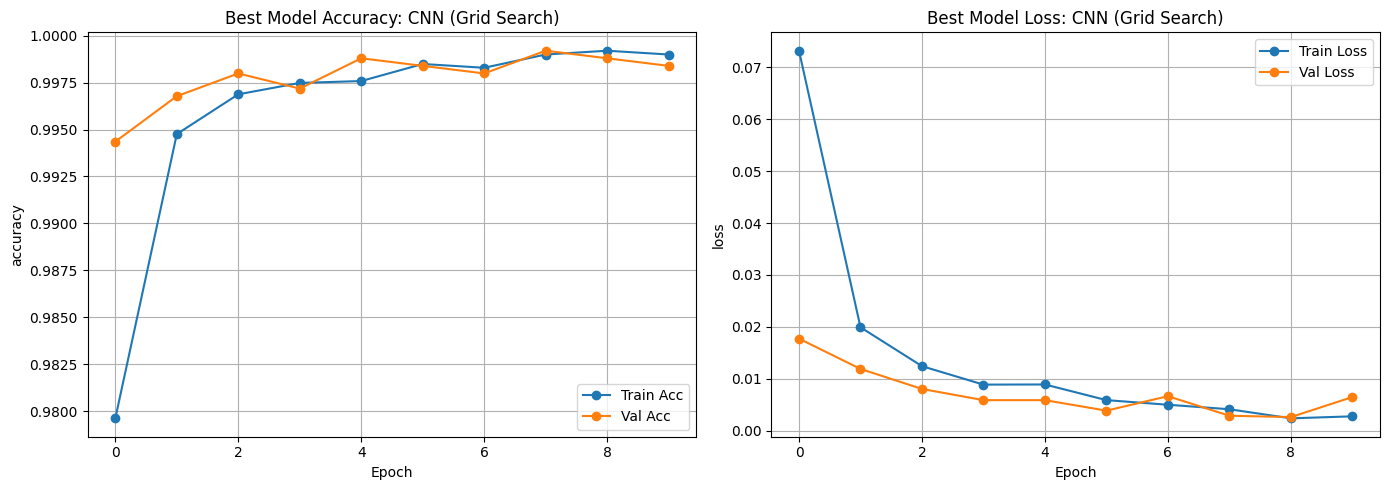

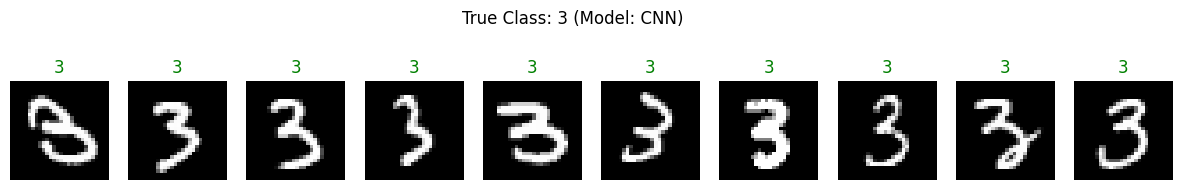

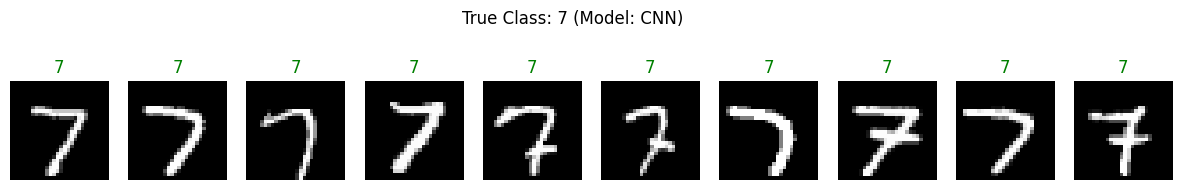

In [ ]:
DIGIT_1 = 3
DIGIT_2 = 7
SEED = 42
GRID_EPOCHS = 10
FINAL_EPOCHS = 8

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(SEED)
np.random.seed(SEED)


# =====================================================================
# ======================== DATA PREPARATION ===========================
#Normalize the data

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean.item(),), (std.item(),))#mean and std computed above
])

# Download and load full MNIST dataset
train_full = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_full = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def get_binary_indices(dataset, d1, d2):
    return [i for i in range(len(dataset)) if int(dataset.targets[i]) in (d1, d2)]

train_indices = get_binary_indices(train_full, DIGIT_1, DIGIT_2)
test_indices = get_binary_indices(test_full, DIGIT_1, DIGIT_2)

class BinaryMNISTDataset(torch.utils.data.Dataset):
    def __init__(self, subset, d1, d2):
        self.subset = subset
        self.label_map = {d1: 0.0, d2: 1.0}

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        img, target = self.subset[idx]
        return img, torch.tensor(self.label_map[int(target)], dtype=torch.float32)

binary_train_data = BinaryMNISTDataset(Subset(train_full, train_indices), DIGIT_1, DIGIT_2)
binary_test_data = BinaryMNISTDataset(Subset(test_full, test_indices), DIGIT_1, DIGIT_2)

#Create a validation set out of the train set (80%-20% split)
train_size = int(0.8 * len(binary_train_data))
val_size = len(binary_train_data) - train_size
train_dataset, val_dataset = random_split(
    binary_train_data, [train_size, val_size],
    generator=torch.Generator().manual_seed(SEED)
)

# ========================== MODEL DEFINITION ==========================

#MLP MODEL
class BinaryMLP(nn.Module):
    def __init__(self, hidden_size, activation_name):
        super().__init__()
        self.flatten = nn.Flatten()
        self.act = nn.ReLU() if activation_name == 'relu' else nn.Sigmoid()
        self.layers = nn.Sequential(
            nn.Linear(28*28, hidden_size),
            self.act,
            nn.Linear(hidden_size, hidden_size//2),
            self.act,
            nn.Linear(hidden_size//2, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

#CNN MODEL
class BinaryCNN(nn.Module):
    def __init__(self):
        super(BinaryCNN, self).__init__()
        # Input: 1x28x28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1) # Output: 16x28x28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)       # Output: 16x14x14
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Output: 32x14x14
                                                                # Pool: 32x7x7
        # Fully connected layer
        self.fc = nn.Linear(32 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1) # Flatten the output for the FC layer
        x = self.fc(x)
        return x


def calculate_accuracy(outputs, labels):
    probs = torch.sigmoid(outputs)
    preds = (probs > 0.5).float()
    return (preds == labels.unsqueeze(1)).float().sum() #sum for batch

#Write a training function
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        # Reshaping is handled internally by BinaryMLP (nn.Flatten) and BinaryCNN (forward).

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        # Statistics
        total_loss += loss.item() * inputs.size(0)
        correct += calculate_accuracy(outputs, labels)
        total += inputs.size(0)
    return total_loss / total, (correct / total).item() #return the average loss and accuracy for the epoch

#Write an evaluation function that returns the accuracy
def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            # Reshaping is handled internally.

            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            total_loss += loss.item() * inputs.size(0)
            correct += calculate_accuracy(outputs, labels)
            total += inputs.size(0)
    return total_loss / total, (correct / total).item()


# ============================= GRID SEARCH ============================
grid_history = {} # store training curves for each configuration

# SEPARATE PARAMETER GRIDS FOR MLP AND CNN
param_mlp = {
    'model_type': ['MLP'],
    'act_name': ['relu', 'sigmoid'],
    'lr': [0.001, 0.01],
    'hidden_size': [64, 128],
    'batch_size': [32, 64]
}

param_cnn = {
    'model_type': ['CNN'],
    'act_name': ['relu'], # CNNs typically use ReLU, and 'H' is ignored
    'lr': [0.001, 0.0005], # Testing different LR for CNN
    'hidden_size': [None], # Dummy value, ignored for CNN
    'batch_size': [32, 64]
}

def generate_combinations(param_dict):
    keys, values = zip(*param_dict.items())
    return [dict(zip(keys, v)) for v in itertools.product(*values)]

combinations = generate_combinations(param_mlp) + generate_combinations(param_cnn)

best_overall_acc = 0.0
best_overall_params = {}
best_history = None

print("\n" + "="*60)
print("GRID SEARCH START (MLP and CNN)")
print("="*60)

for idx, combo in enumerate(combinations):
    train_loader = DataLoader(train_dataset, batch_size=combo['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=combo['batch_size'], shuffle=False)

    if combo['model_type'] == 'MLP':
        model = BinaryMLP(combo['hidden_size'], combo['act_name']).to(DEVICE)
    elif combo['model_type'] == 'CNN':
        # CNN doesn't use hidden_size or act_name directly in this simplified model
        model = BinaryCNN().to(DEVICE)
    else:
        continue

    optimizer = optim.Adam(model.parameters(), lr=combo['lr'])
    criterion = nn.BCEWithLogitsLoss()

    hist = {
        "train_loss": [], "train_acc": [],
        "val_loss": [], "val_acc": []
    }

    print(f"\n--- Run {idx+1}/{len(combinations)} | Model={combo['model_type']} | Act={combo['act_name']} | LR={combo['lr']} | H={combo['hidden_size']} | B={combo['batch_size']} ---")
    # Training loop
    for epoch in range(GRID_EPOCHS):
        t_loss, t_acc = train_epoch(model, train_loader, optimizer, criterion)
        v_loss, v_acc = evaluate(model, val_loader, criterion)

        hist["train_loss"].append(t_loss)
        hist["train_acc"].append(t_acc)
        hist["val_loss"].append(v_loss)
        hist["val_acc"].append(v_acc)

        print(f"Epoch {epoch+1:02d} | TrainAcc={t_acc*100:.2f}% | ValAcc={v_acc*100:.2f}%")

    final_val_acc = hist["val_acc"][-1]

    grid_history[tuple(combo.values())] = hist

    if final_val_acc > best_overall_acc:
        best_overall_acc = final_val_acc
        best_overall_params = combo
        best_history = hist


print("\n" + "="*60)
print(f"BEST MODEL: {best_overall_params['model_type']} with Activation: {best_overall_params.get('act_name')}")
print(f"Params: {best_overall_params}")
print(f"Val Accuracy: {best_overall_acc*100:.2f}%")
print("="*60)

#Plot the training and validation accuracy for each epoch
# ========================= PLOT BEST CURVES ==========================
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(best_history["train_acc"], marker="o", label="Train Acc")
plt.plot(best_history["val_acc"], marker="o", label="Val Acc")
plt.title(f"Best Model Accuracy: {best_overall_params['model_type']} (Grid Search)")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(best_history["train_loss"], marker="o", label="Train Loss")
plt.plot(best_history["val_loss"], marker="o", label="Val Loss")
plt.title(f"Best Model Loss: {best_overall_params['model_type']} (Grid Search)")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("best_model_curves.png")

#final training on train + val set on the best model found
# ======================= FINAL TRAINING ON TRAIN+VAL =================
full_train = torch.utils.data.ConcatDataset([train_dataset, val_dataset])
train_full_loader = DataLoader(full_train, batch_size=best_overall_params["batch_size"], shuffle=True)

if best_overall_params['model_type'] == 'MLP':
    model = BinaryMLP(best_overall_params["hidden_size"], best_overall_params["act_name"]).to(DEVICE)
elif best_overall_params['model_type'] == 'CNN':
    model = BinaryCNN().to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=best_overall_params["lr"])
criterion = nn.BCEWithLogitsLoss()

print("\n" + "="*60)
print(f"FINAL TRAINING ({best_overall_params['model_type']} on TRAIN + VAL)")
print("="*60)

for epoch in range(FINAL_EPOCHS):
    t_loss, t_acc = train_epoch(model, train_full_loader, optimizer, criterion)
    print(f"Epoch {epoch+1:02d} | Train Loss={t_loss:.4f} | Train Acc={t_acc*100:.2f}%")

#Print the test set accuracy
# =========================== TEST EVALUATION =========================
test_loader = DataLoader(binary_test_data, batch_size=best_overall_params["batch_size"], shuffle=False)
test_loss, test_acc = evaluate(model, test_loader, criterion)

print("\n" + "="*60)
print(f"TEST ACCURACY: {test_acc*100:.2f}% (Model: {best_overall_params['model_type']})")
print("="*60)

#Plot 10 test images of each class with their predicited labels
# ========================= PLOT PREDICTIONS ==========================
def plot_predictions(model, target_class_label, true_digit_name, best_overall_params):
    model.eval()
    images, preds = [], []

    with torch.no_grad():
        for img, label in binary_test_data:
            if len(images) >= 10:
                break
            if label == target_class_label:
                input_data = img.unsqueeze(0).to(DEVICE)
                logit = model(input_data)

                pred_label = 1 if torch.sigmoid(logit).item() > 0.5 else 0
                images.append(img)
                preds.append(pred_label)

    plt.figure(figsize=(15,2))
    for i in range(10):
        plt.subplot(1,10, i+1)
        disp_img = images[i].squeeze() * std + mean  # Denormalize
        plt.imshow(disp_img.cpu().numpy(), cmap='gray')
        plt.axis('off')
        pred_digit = DIGIT_2 if preds[i] == 1 else DIGIT_1
        color = 'green' if preds[i] == target_class_label else 'red'
        plt.title(f"{pred_digit}", color=color)
    plt.suptitle(f"True Class: {true_digit_name} (Model: {best_overall_params['model_type']})", y=1.1)
    plt.savefig(f"predictions_{true_digit_name}_{best_overall_params['model_type']}.png")

plot_predictions(model, 0.0, DIGIT_1, best_overall_params)
plot_predictions(model, 1.0, DIGIT_2, best_overall_params)